In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [13]:
sns.set()
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
min_val_corr = 0.4 

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
y = train_df.SalePrice

In [5]:
train_df.drop(['SalePrice'],axis=1,inplace=True)

In [6]:
dataset = pd.concat([train_df,test_df],axis=0)

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   int64  
 5   Alley          2919 non-null   int64  
 6   LotShape       2919 non-null   int64  
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   int64  
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [11]:
dataset.drop(['Id'],axis=1,inplace=True)

Skewness: 1.882876
Kurtosis: 6.536282


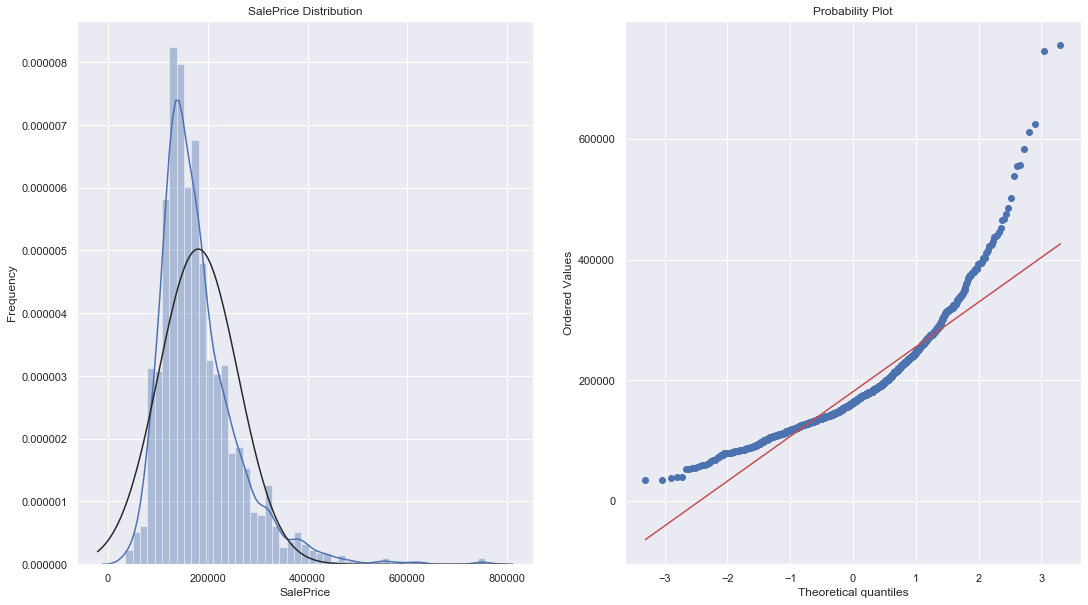

In [14]:
print("Skewness: %f" % y.skew())#RightSkewed
print("Kurtosis: %f" % y.kurt())

figure = plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
sns.distplot(y, fit=norm);
(mu, sigma) = norm.fit(y)
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

plt.subplot(1,2,2)
stats.probplot(y, plot=plt)
plt.show()

In [15]:
y=np.log1p(y)

Skewness: 0.121347
Kurtosis: 0.809519


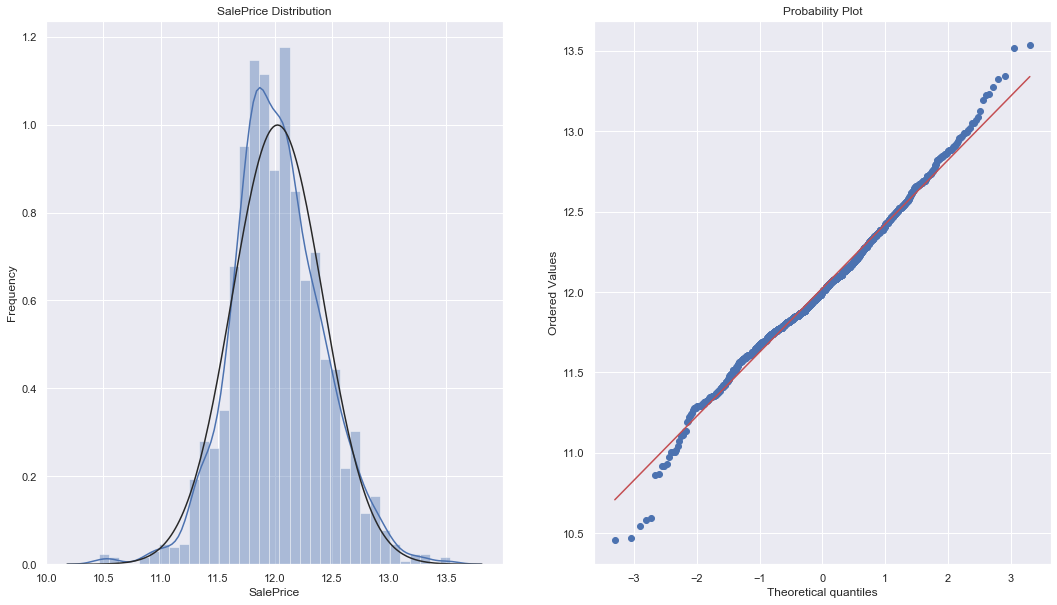

In [16]:
print("Skewness: %f" % y.skew())#RightSkewed
print("Kurtosis: %f" % y.kurt())

figure = plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
sns.distplot(y, fit=norm);
(mu, sigma) = norm.fit(y)
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

plt.subplot(1,2,2)
stats.probplot(y, plot=plt)
plt.show()

In [24]:
missing = dataset.isnull().sum().sort_values(ascending=False)
total = dataset.isnull().count().sort_values(ascending=False)
percent = (dataset.isnull().sum() / dataset.isnull().count()).sort_values(ascending=False)
Missing_values = pd.concat([missing,percent], axis=1, keys=['Missing','Percent'])
Missing_values.head(34) #34 values have missing values

,Missing,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageQual,159,0.054471
GarageCond,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


In [22]:
for col in ('Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'Functional', 'MSZoning', 'SaleType', 'Utilities'):
    dataset[col].fillna(method='ffill',inplace=True)

In [25]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    dataset[col] = dataset[col].fillna(0)
    
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    dataset[col] = dataset[col].fillna('NA')

In [26]:
for col in ('FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC', 'MSSubClass'):
    dataset[col].fillna('NA',inplace=True)

In [27]:
dataset['MasVnrType'].fillna('NA',inplace=True)
dataset['MasVnrArea'].fillna(0,inplace=True)

In [29]:
dataset["LotFrontage"] = dataset.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [31]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    dataset[col].fillna(0,inplace=True)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    dataset[col].fillna('NA',inplace=True)
#All the data has non null values

In [34]:
from sklearn.preprocessing import LabelEncoder
categorical_col = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for col in categorical_col:
    label = LabelEncoder() 
    label.fit(list(dataset[col].values)) 
    dataset[col] = label.transform(list(dataset[col].values))

print('Shape all_data: {}'.format(dataset.shape))

Shape all_data: (2919, 79)


In [36]:
dataset['TotalBath']=dataset['BsmtFullBath'] + dataset['FullBath'] + (0.5*dataset['BsmtHalfBath']) + (0.5*dataset['HalfBath'])

In [37]:
dataset['TotalSF']=dataset['TotalBsmtSF']  + dataset['1stFlrSF'] + dataset['2ndFlrSF']

In [38]:
dataset['YrBltAndRemod']=dataset['YearBuilt']+dataset['YearRemodAdd']

In [40]:
dataset['Porch_SF'] = (dataset['OpenPorchSF'] + dataset['3SsnPorch'] + dataset['EnclosedPorch'] + dataset['ScreenPorch'] + dataset['WoodDeckSF'])

In [41]:
dataset['Has2ndfloor'] = dataset['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
dataset['HasBsmt'] = dataset['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
dataset['HasFirePlace'] =dataset['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
dataset['Has2ndFlr']=dataset['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
dataset['HasPool']=dataset['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

In [56]:
from datetime import datetime
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error , make_scorer, mean_squared_log_error
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor

In [45]:
dataset = pd.get_dummies(dataset) 
X = dataset[:len(train_df)]
test = dataset[len(train_df):]

In [46]:
dataset.shape

(2919, 232)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [52]:
rfr = RandomForestRegressor() #Model1
rfr.fit(X_train,y_train)
y_rfr = rfr.predict(X_test)
mean_squared_log_error(y_test,y_rfr)

0.00011652596376132144

In [54]:
# Indicate number of folds for cross validation
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

# Parameters for models
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]

In [55]:
# Lasso Model
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas = alphas2, random_state = 42, cv=kfolds))
# Printing Lasso Score with Cross-Validation
lasso_score = cross_val_score(lasso, X, y, cv=kfolds, scoring='neg_mean_squared_error')
lasso_rmse = np.sqrt(-lasso_score.mean())
print("LASSO RMSE: ", lasso_rmse)
print("LASSO STD: ", lasso_score.std())

LASSO RMSE:  0.15140978425798993
LASSO STD:  0.014631654774269861


In [67]:
lasso = LassoCV(max_iter=1e7, alphas = alphas2, random_state = 42, cv=kfolds)#Model2
lasso.fit(X_train,y_train)
y_lasso = lasso.predict(X_test)
mean_squared_log_error(y_test,y_lasso)

0.0002375401739622531

In [59]:
lightgbm = make_pipeline(RobustScaler(),
                        LGBMRegressor(objective='regression',num_leaves=5,
                                      learning_rate=0.05, n_estimators=720,
                                      max_bin = 55, bagging_fraction = 0.8,
                                      bagging_freq = 5, feature_fraction = 0.2319,
                                      feature_fraction_seed=9, bagging_seed=9,
                                      min_data_in_leaf =6, 
                                      min_sum_hessian_in_leaf = 11))

# Printing out LightGBM Score and STD
lightgbm_score = cross_val_score(lightgbm, X, y, cv=kfolds, scoring='neg_mean_squared_error')
lightgbm_rmse = np.sqrt(-lightgbm_score.mean())
print("LIGHTGBM RMSE: ", lightgbm_rmse)
print("LIGHTGBM STD: ", lightgbm_score.std())

LIGHTGBM RMSE:  0.1276607893989099
LIGHTGBM STD:  0.004749388577871527


In [60]:
lightgbm = LGBMRegressor(objective='regression',num_leaves=5,
                                      learning_rate=0.05, n_estimators=720,
                                      max_bin = 55, bagging_fraction = 0.8,
                                      bagging_freq = 5, feature_fraction = 0.2319,
                                      feature_fraction_seed=9, bagging_seed=9,
                                      min_data_in_leaf =6, 
                                      min_sum_hessian_in_leaf = 11) #Model3
lightgbm.fit(X_train,y_train)
y_lgbm = lightgbm.predict(X_test)
mean_squared_log_error(y_test,y_lgbm)

0.00010090402584675049

In [61]:
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))
elastic_score = cross_val_score(elasticnet, X, y, cv=kfolds, scoring='neg_mean_squared_error')
elastic_rmse =  np.sqrt(-elastic_score.mean())

# Printing out ElasticNet Score and STD
print("ELASTICNET RMSE: ", elastic_rmse)
print("ELASTICNET STD: ", elastic_score.std())

ELASTICNET RMSE:  0.1514594830356493
ELASTICNET STD:  0.014592269160649369


In [66]:
elasticnet = ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio) #Model4
elasticnet.fit(X_train,y_train)
y_elastic = elasticnet.predict(X_test)
mean_squared_log_error(y_test,y_elastic)

0.0002375401739622531

In [64]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas = alphas_alt, cv=kfolds))
ridge_score = cross_val_score(ridge, X, y, cv=kfolds, scoring='neg_mean_squared_error')
ridge_rmse =  np.sqrt(-ridge_score.mean())
# Printing out Ridge Score and STD
print("RIDGE RMSE: ", ridge_rmse)
print("RIDGE STD: ", ridge_score.std())

RIDGE RMSE:  0.1524557256987541
RIDGE STD:  0.01412655604157869


In [65]:
ridge = RidgeCV(alphas = alphas_alt, cv=kfolds) #Model5
ridge.fit(X_train,y_train)
y_ridge = ridge.predict(X_test)
mean_squared_log_error(y_test,y_ridge)

0.00019292887256430855

In [68]:
X_test = scaler.transform(test)

In [69]:
rfr_pred = rfr.predict(X_test)
lasso_pred = lasso.predict(X_test)
lightgbm_pred = lightgbm.predict(X_test)
ridge_pred = ridge.predict(X_test)
elasticnet_pred = elasticnet.predict(X_test)


In [70]:
y_pred = np.expm1((0.25*rfr_pred) + (0.25*lightgbm_pred) + (0.2*ridge_pred) + (0.15*lasso_pred) + (0.15*elasticnet_pred))

In [73]:
submit2 = pd.DataFrame(test_df['Id'])

In [75]:
submit2['SalePrice']=y_pred

In [76]:
submit2.head()

,Id,SalePrice
0,1461,119132.147709
1,1462,157155.590551
2,1463,179238.223060
3,1464,191579.196703
4,1465,188072.882118


In [77]:
submit2.to_csv('submit2.csv',index=False)

In [79]:
y_pred2 = np.expm1((0.45*rfr_pred) + (0.55*lightgbm_pred)) #now combining only rfr and light gbm
submit3 = pd.DataFrame(test_df['Id'])
submit3['SalePrice']=y_pred2
submit3.to_csv('submit3.csv',index=False)

In [80]:
submit3.head()

,Id,SalePrice
0,1461,124404.857423
1,1462,161844.276854
2,1463,184300.336071
3,1464,188088.159017
4,1465,187191.616342


In [83]:
y_pred3 = np.expm1((0.35*rfr_pred) + (0.4*lightgbm_pred)+ (0.25*ridge_pred)) #now combining only rfr, light gbm and ridge
submit4 = pd.DataFrame(test_df['Id'])
submit4['SalePrice']=y_pred3
submit4.to_csv('submit4.csv',index=False)

In [84]:
submit4.head()

,Id,SalePrice
0,1461,121279.178459
1,1462,160187.216863
2,1463,181782.728100
3,1464,190146.553440
4,1465,187571.576264
